In [ ]:
'''
Bienvenue sur ce notebook.
J'ai codé un SMA Covid.
Les résultats de la simulation arrivent dans le fichier log.txt

Les paramètres utilisés sont dans le fichier config.txt





'''

In [56]:
import pandas as pd


dfCasCovidByDep = pd.read_csv('sp-pe-tb-quot-dep-2022-02-06-19h05.csv',sep=';',index_col=1)
dfCasCovidByDep = dfCasCovidByDep.drop('cl_age90',axis=1)
#dfCasCovidByDep = dfCasCovidByDep.groupby(['dep','jour']).sum()
#type(dfCasCovidByDep)
df63 = dfCasCovidByDep.loc[dfCasCovidByDep['dep'] == 63]
df63 = df63.groupby(['jour'])
print(df63)
for key,item in df63:
    print(item)
#dfCasCovidByDep

/home/local.isima.fr/beantune/mambaforge/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


           dep  P       pop
jour                       
2020-05-13  63  0   68489.0
2020-05-13  63  0   79191.0
2020-05-13  63  0   75092.0
2020-05-13  63  0   77930.0
2020-05-13  63  0   83111.0
2020-05-13  63  1   86381.0
2020-05-13  63  1   84468.0
2020-05-13  63  0   61456.0
2020-05-13  63  1   34498.0
2020-05-13  63  0    9624.0
2020-05-13  63  3  660240.0
           dep  P       pop
jour                       
2020-05-14  63  0   68489.0
2020-05-14  63  0   79191.0
2020-05-14  63  0   75092.0
2020-05-14  63  0   77930.0
2020-05-14  63  0   83111.0
2020-05-14  63  1   86381.0
2020-05-14  63  0   84468.0
2020-05-14  63  2   61456.0
2020-05-14  63  0   34498.0
2020-05-14  63  0    9624.0
2020-05-14  63  3  660240.0
           dep  P       pop
jour                       
2020-05-15  63  0   68489.0
2020-05-15  63  1   79191.0
2020-05-15  63  1   75092.0
2020-05-15  63  0   77930.0
2020-05-15  63  2   83111.0
2020-05-15  63  0   86381.0
2020-05-15  63  0   84468.0
2020-05-15  63  0   

           dep    P       pop
jour                         
2020-12-01  63    4   68489.0
2020-12-01  63   15   79191.0
2020-12-01  63   14   75092.0
2020-12-01  63   20   77930.0
2020-12-01  63   19   83111.0
2020-12-01  63   16   86381.0
2020-12-01  63   13   84468.0
2020-12-01  63   14   61456.0
2020-12-01  63   14   34498.0
2020-12-01  63   19    9624.0
2020-12-01  63  148  660240.0
           dep    P       pop
jour                         
2020-12-02  63    1   68489.0
2020-12-02  63   15   79191.0
2020-12-02  63   16   75092.0
2020-12-02  63   10   77930.0
2020-12-02  63   10   83111.0
2020-12-02  63   10   86381.0
2020-12-02  63    6   84468.0
2020-12-02  63   10   61456.0
2020-12-02  63   18   34498.0
2020-12-02  63   16    9624.0
2020-12-02  63  112  660240.0
           dep    P       pop
jour                         
2020-12-03  63    1   68489.0
2020-12-03  63   10   79191.0
2020-12-03  63   13   75092.0
2020-12-03  63    9   77930.0
2020-12-03  63   17   83111.0
2020-12-03

           dep    P       pop
jour                         
2021-08-04  63    4   68489.0
2021-08-04  63   15   79191.0
2021-08-04  63   33   75092.0
2021-08-04  63   17   77930.0
2021-08-04  63   12   83111.0
2021-08-04  63   14   86381.0
2021-08-04  63    0   84468.0
2021-08-04  63    7   61456.0
2021-08-04  63    4   34498.0
2021-08-04  63    5    9624.0
2021-08-04  63  111  660240.0
           dep   P       pop
jour                        
2021-08-05  63   5   68489.0
2021-08-05  63  15   79191.0
2021-08-05  63  29   75092.0
2021-08-05  63  19   77930.0
2021-08-05  63  12   83111.0
2021-08-05  63   9   86381.0
2021-08-05  63   6   84468.0
2021-08-05  63   0   61456.0
2021-08-05  63   2   34498.0
2021-08-05  63   0    9624.0
2021-08-05  63  97  660240.0
           dep    P       pop
jour                         
2021-08-06  63    9   68489.0
2021-08-06  63   19   79191.0
2021-08-06  63   34   75092.0
2021-08-06  63   25   77930.0
2021-08-06  63   12   83111.0
2021-08-06  63    9   8

In [7]:
!make

g++ -o World.o -c World.cpp -MMD -O2 -Wall -Wextra
Dans le fichier inclus depuis World.hpp:6,
                 depuis World.cpp:1:
RandMT.hpp:37:22: attention: « _compteur » défini mais pas utilisé [-Wunused-variable]
   37 | static unsigned long _compteur = 0;
      |                      ^~~~~~~~~
RandMT.hpp:36:22: attention: « _mag01 » défini mais pas utilisé [-Wunused-variable]
   36 | static uint32_t      _mag01[2] = {0x0UL, MATRIX_A};
      |                      ^~~~~~
g++ -O2 Human.o Position.o World.o main.o SimulationParams.o RandMT.o  -o exe


In [4]:
## A CHANGER EN FONCTION DE LA CONFIG QUE VOUS VOULEZ TESTER

In [36]:
!./replicationParisFullNoVaccin.sh 30

***************STATISTICS******************
Safe : 723726
Contamined : 0
Recovered : 1251731
Dead : 24543

real	98m4,089s
user	97m53,615s
sys	0m9,987s
***************STATISTICS******************
Safe : 725650
Contamined : 0
Recovered : 1249667
Dead : 24683

real	99m36,742s
user	99m26,079s
sys	0m10,187s
***************STATISTICS******************
Safe : 722805
Contamined : 0
Recovered : 1252684
Dead : 24511

real	100m13,339s
user	100m2,345s
sys	0m10,471s
***************STATISTICS******************
Safe : 722935
Contamined : 0
Recovered : 1252632
Dead : 24433

real	100m37,977s
user	100m27,390s
sys	0m9,983s
***************STATISTICS******************
Safe : 721867
Contamined : 0
Recovered : 1253535
Dead : 24598

real	100m49,741s
user	100m39,151s
sys	0m10,055s
***************STATISTICS******************
Safe : 724555
Contamined : 0
Recovered : 1251093
Dead : 24352

real	107m51,116s
user	107m38,242s
sys	0m12,311s
***************STATISTICS******************
Safe : 722573
Contamined : 0
Recov

Courbe des nouveaux cas sur la réplication num : 0
Courbe des nouvelles hospitalisation sur la réplication num : 0
Courbe des nouvelles réanimation sur la réplication num : 0
Courbe des nouveaux morts sur la réplication num : 0
Courbe de Reffectif sur la réplication num : 0
Le taux de mort de cas connu est de : 1.9406582186503638%
Le taux de mortalité pour les 0 - 15 ans est de : 0.0%
Le taux de mortalité pour les 15 - 25 ans est de : 0.019875183845450572%
Le taux de mortalité pour les 25 - 35 ans est de : 0.013072704880247142%
Le taux de mortalité pour les 35 - 45 ans est de : 0.17555200648972039%
Le taux de mortalité pour les 45 - 55 ans est de : 0.5902492956239523%
Le taux de mortalité pour les 55 - 65 ans est de : 1.7085346315392276%
Le taux de mortalité pour les 65 - 75 ans est de : 3.580626058694724%
Le taux de mortalité pour les 75 + ans est de : 12.597196831200488%
############
################
 replication = 0
Courbe des nouveaux cas sur la réplication num : 1
Courbe des nouve

/tmp/ipykernel_160701/829346468.py:87: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(listResReplication.index(replication)*5)


Courbe des nouveaux cas sur la réplication num : 4
Courbe des nouvelles hospitalisation sur la réplication num : 4
Courbe des nouvelles réanimation sur la réplication num : 4
Courbe des nouveaux morts sur la réplication num : 4
Courbe de Reffectif sur la réplication num : 4
Le taux de mort de cas connu est de : 1.9095360717599656%
Le taux de mortalité pour les 0 - 15 ans est de : 0.0%
Le taux de mortalité pour les 15 - 25 ans est de : 0.010585020872338032%
Le taux de mortalité pour les 25 - 35 ans est de : 0.021982249333663065%
Le taux de mortalité pour les 35 - 45 ans est de : 0.18633461372135027%
Le taux de mortalité pour les 45 - 55 ans est de : 0.5986384842425974%
Le taux de mortalité pour les 55 - 65 ans est de : 1.7219359943183588%
Le taux de mortalité pour les 65 - 75 ans est de : 3.5314348317489372%
Le taux de mortalité pour les 75 + ans est de : 12.296060485475527%
############
################
 replication = 4
Courbe des nouveaux cas sur la réplication num : 5
Courbe des nouv

Courbe des nouveaux cas sur la réplication num : 13
Courbe des nouvelles hospitalisation sur la réplication num : 13
Courbe des nouvelles réanimation sur la réplication num : 13
Courbe des nouveaux morts sur la réplication num : 13
Courbe de Reffectif sur la réplication num : 13
Le taux de mort de cas connu est de : 1.926192534602883%
Le taux de mortalité pour les 0 - 15 ans est de : 0.0%
Le taux de mortalité pour les 15 - 25 ans est de : 0.00991519205727015%
Le taux de mortalité pour les 25 - 35 ans est de : 0.011625759948573108%
Le taux de mortalité pour les 35 - 45 ans est de : 0.17228883492059455%
Le taux de mortalité pour les 45 - 55 ans est de : 0.5931643172357113%
Le taux de mortalité pour les 55 - 65 ans est de : 1.7152232276026649%
Le taux de mortalité pour les 65 - 75 ans est de : 3.5513629742664907%
Le taux de mortalité pour les 75 + ans est de : 12.471445929526125%
############
################
 replication = 13
Courbe des nouveaux cas sur la réplication num : 14
Courbe des

Courbe des nouveaux cas sur la réplication num : 22
Courbe des nouvelles hospitalisation sur la réplication num : 22
Courbe des nouvelles réanimation sur la réplication num : 22
Courbe des nouveaux morts sur la réplication num : 22
Courbe de Reffectif sur la réplication num : 22
Le taux de mort de cas connu est de : 1.9230196650562497%
Le taux de mortalité pour les 0 - 15 ans est de : 0.0%
Le taux de mortalité pour les 15 - 25 ans est de : 0.016567482670413126%
Le taux de mortalité pour les 25 - 35 ans est de : 0.02114323518779967%
Le taux de mortalité pour les 35 - 45 ans est de : 0.1875468867216804%
Le taux de mortalité pour les 45 - 55 ans est de : 0.5897572255716821%
Le taux de mortalité pour les 55 - 65 ans est de : 1.6791194665381217%
Le taux de mortalité pour les 65 - 75 ans est de : 3.526354349538989%
Le taux de mortalité pour les 75 + ans est de : 12.51067220672776%
############
################
 replication = 22
Courbe des nouveaux cas sur la réplication num : 23
Courbe des n

/home/local.isima.fr/beantune/mambaforge/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2098: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/local.isima.fr/beantune/mambaforge/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2099: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


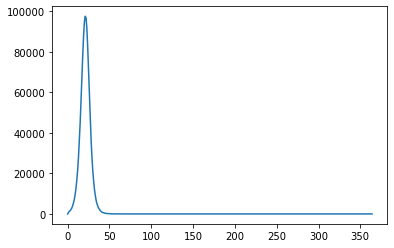

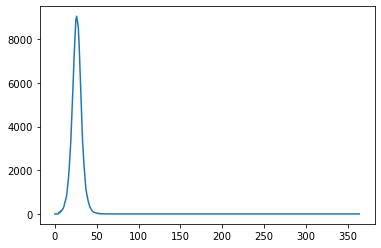

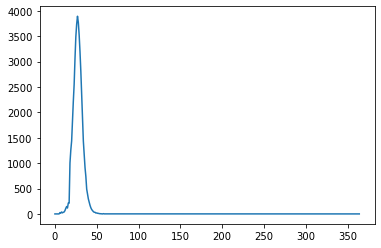

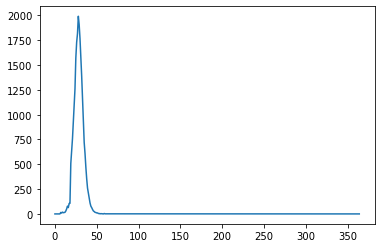

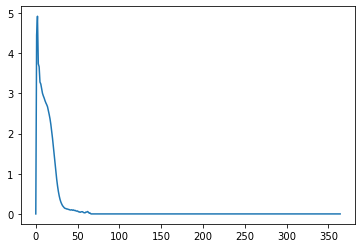

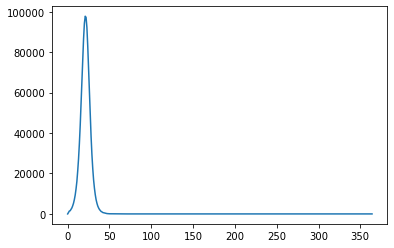

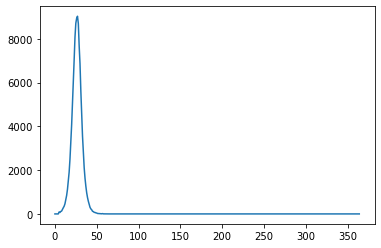

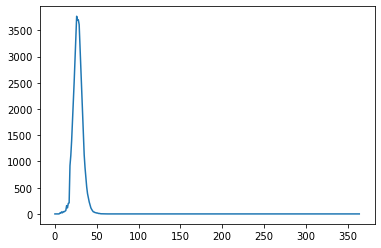

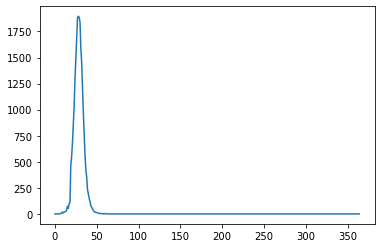

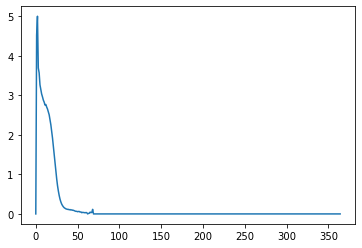

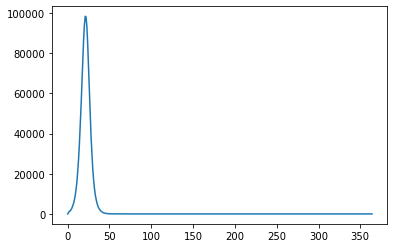

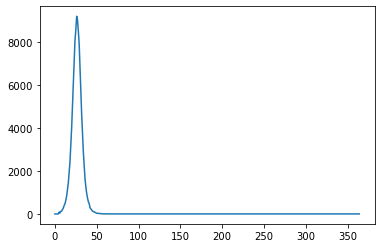

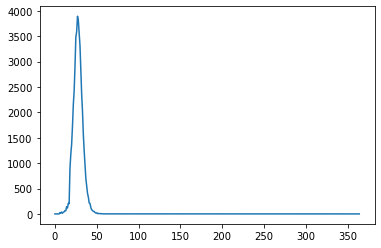

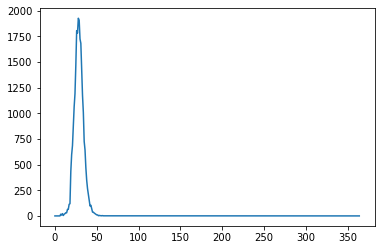

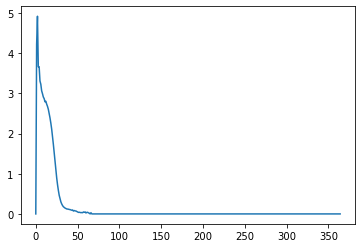

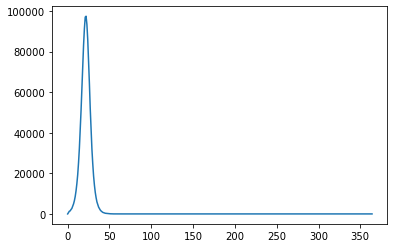

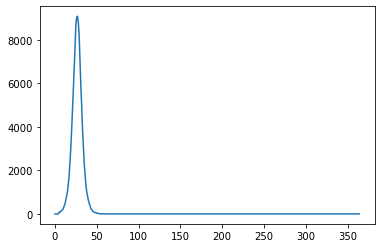

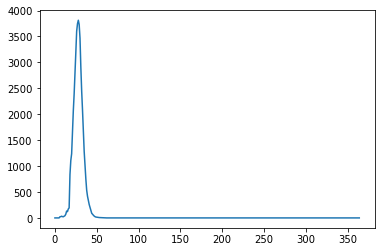

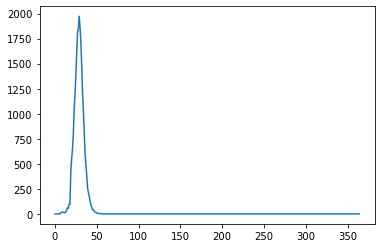

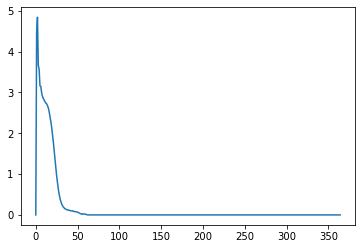

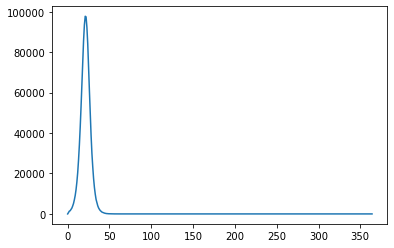

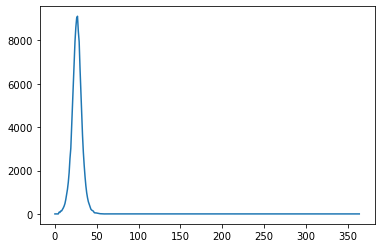

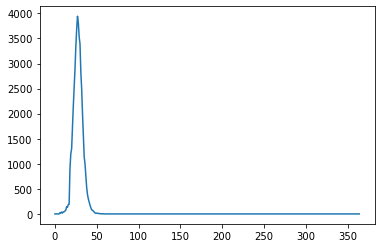

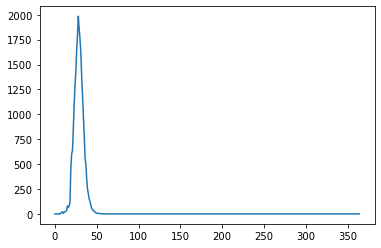

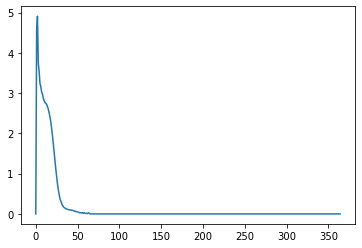

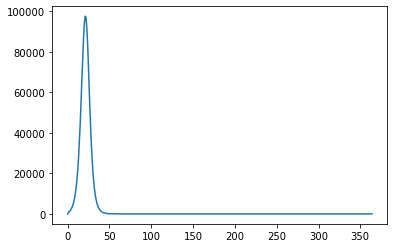

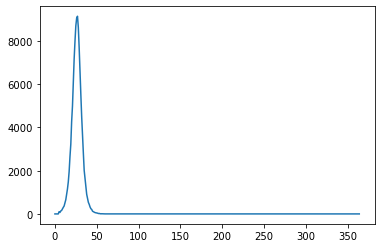

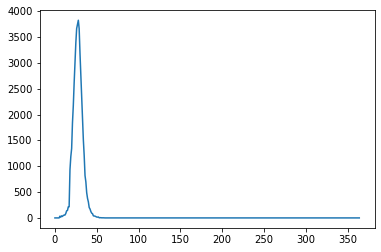

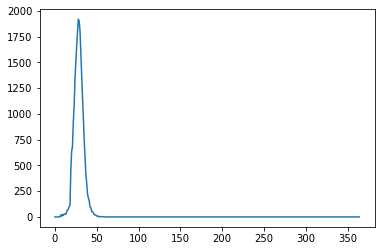

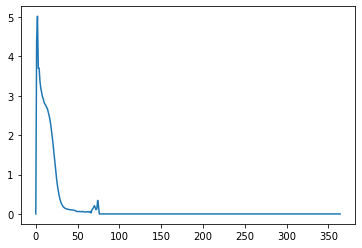

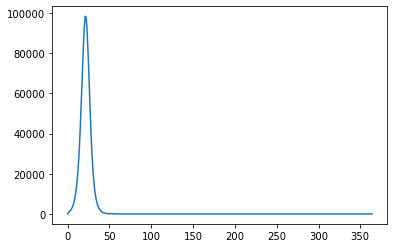

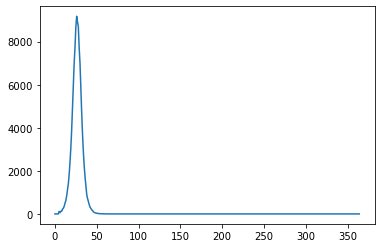

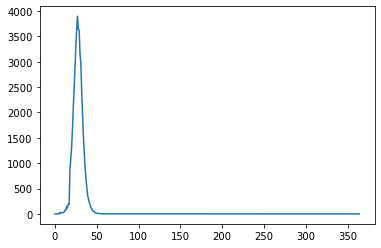

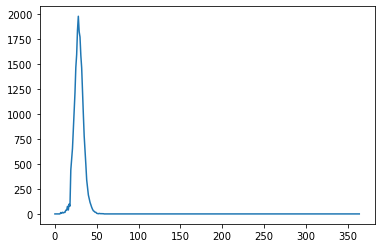

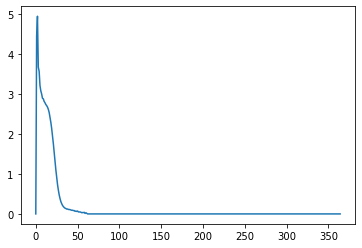

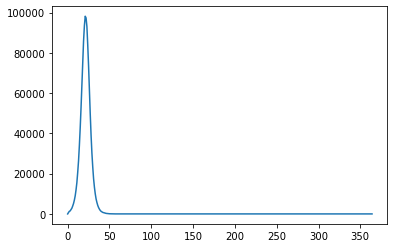

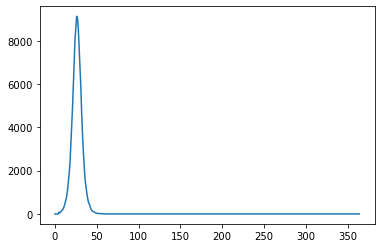

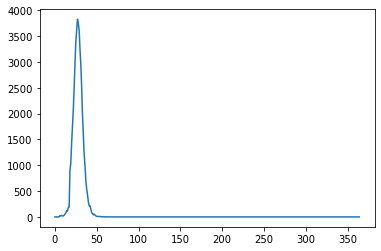

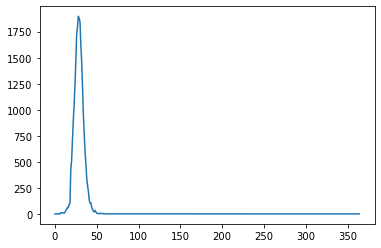

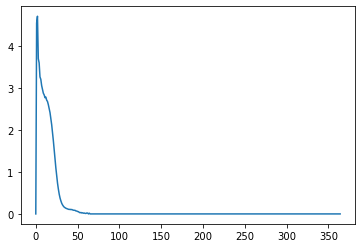

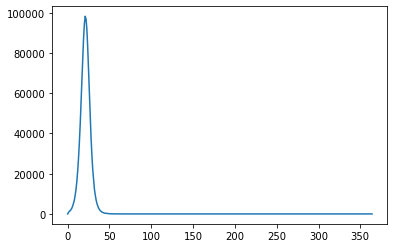

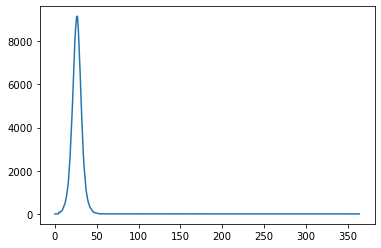

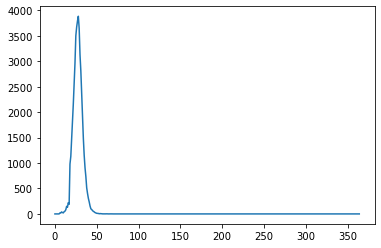

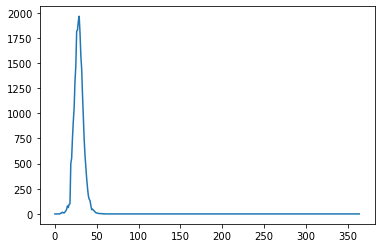

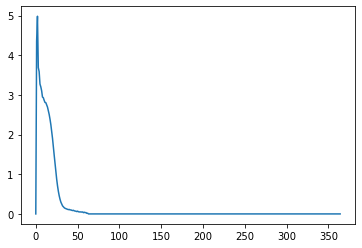

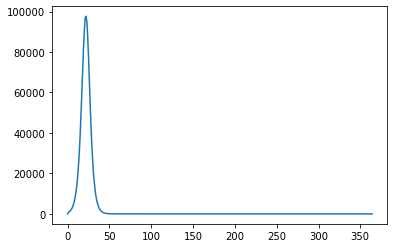

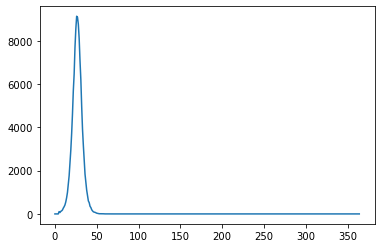

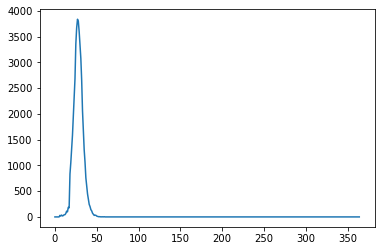

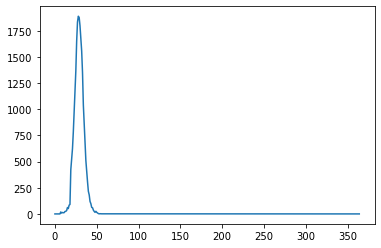

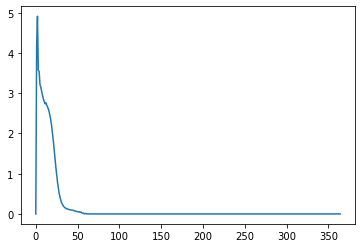

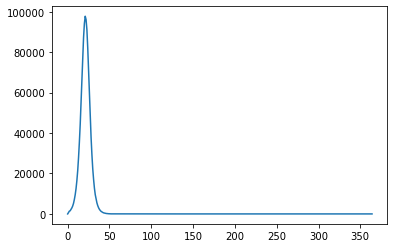

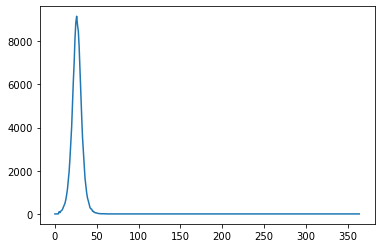

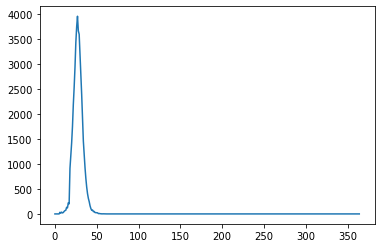

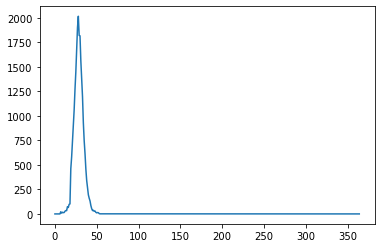

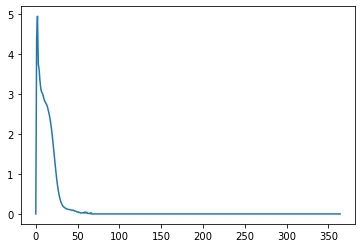

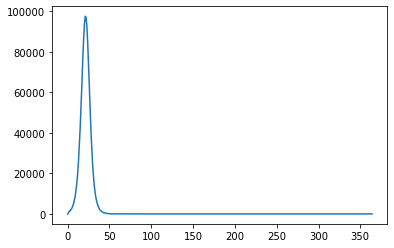

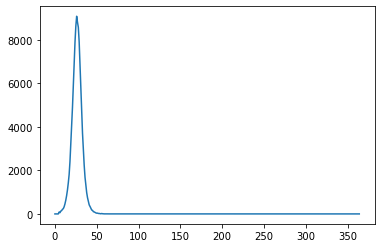

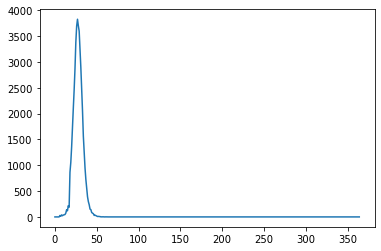

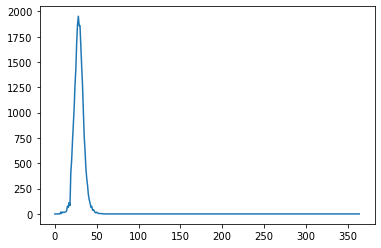

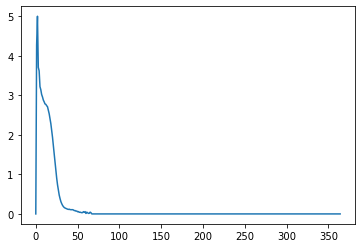

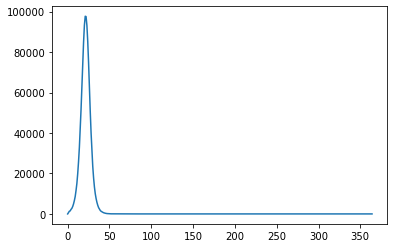

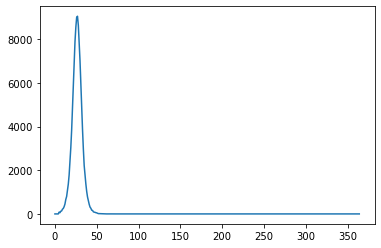

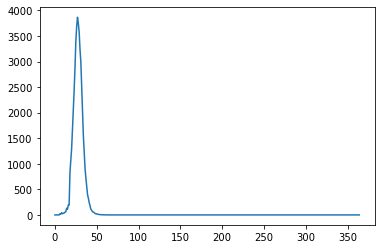

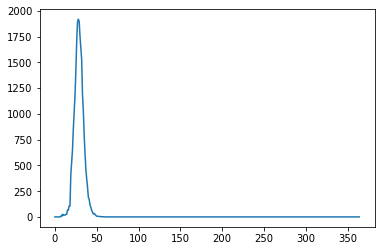

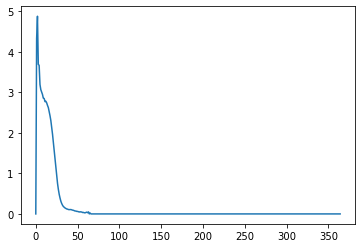

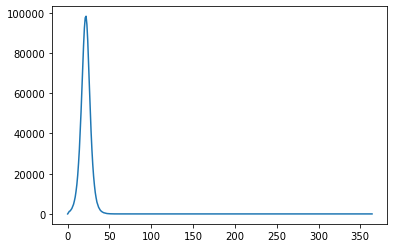

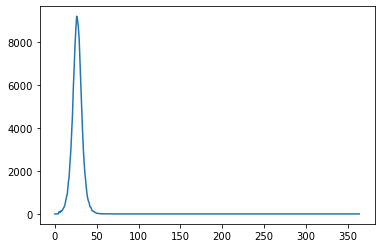

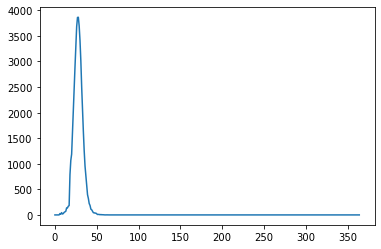

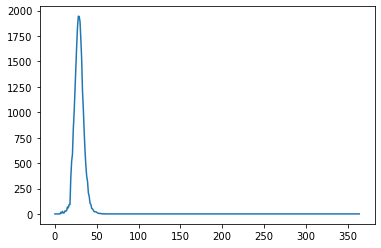

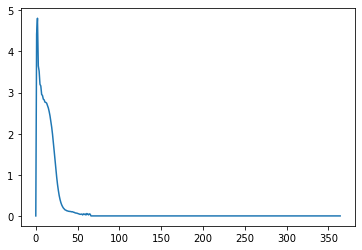

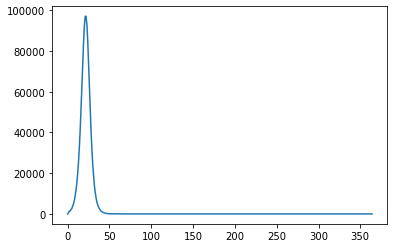

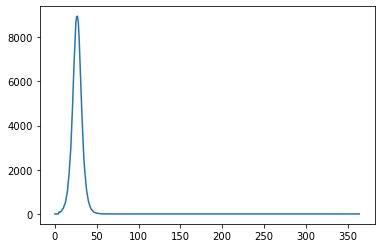

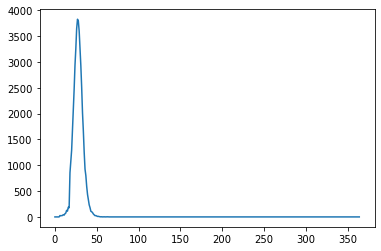

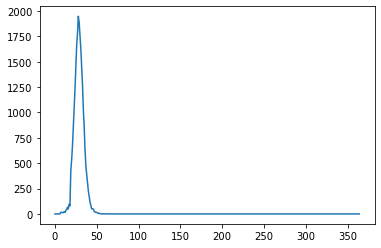

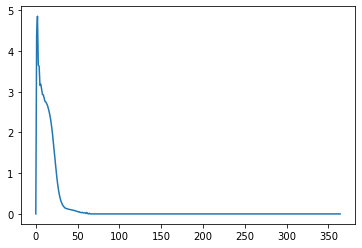

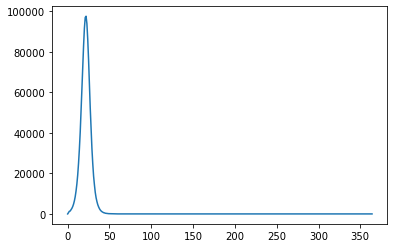

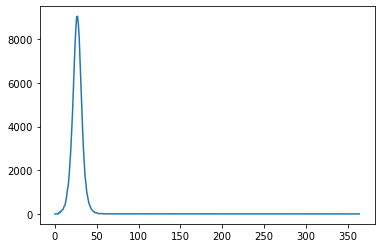

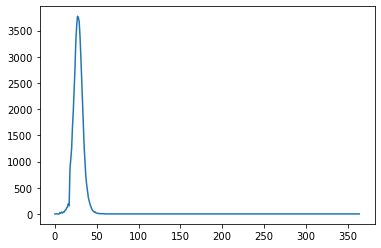

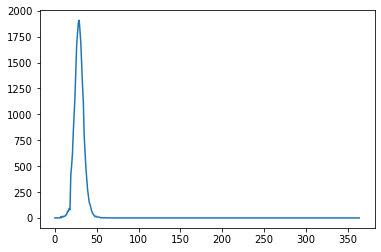

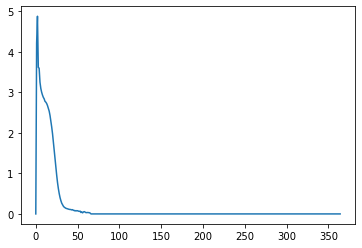

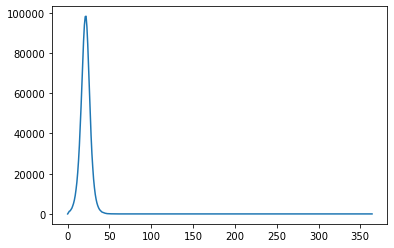

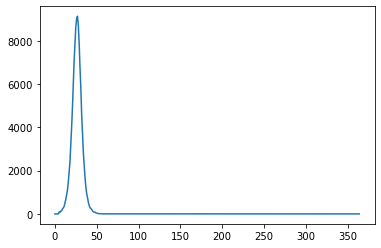

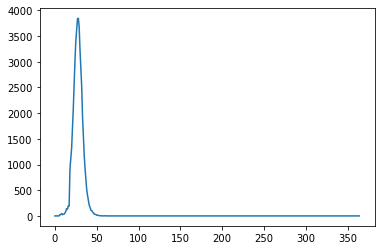

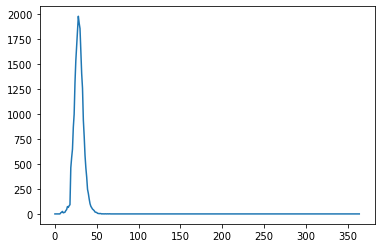

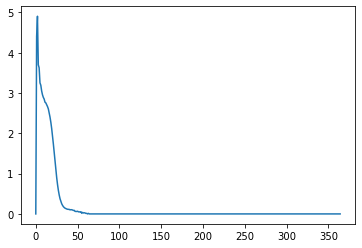

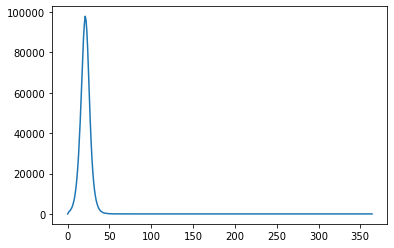

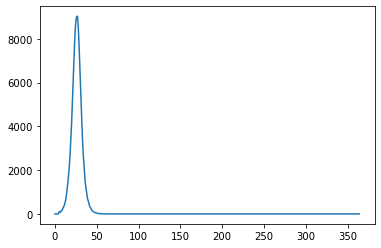

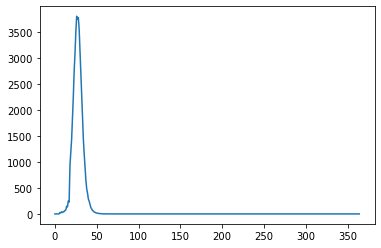

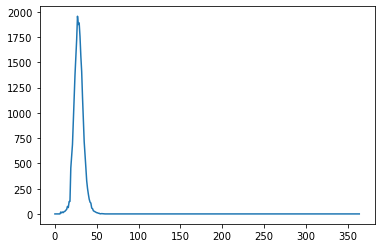

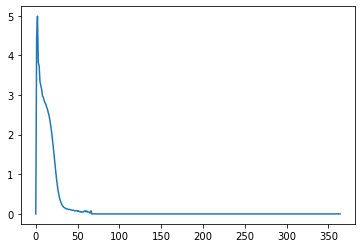

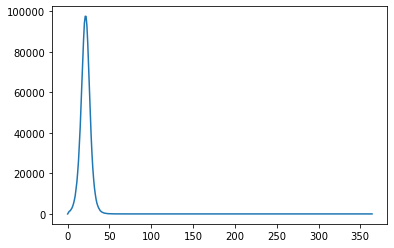

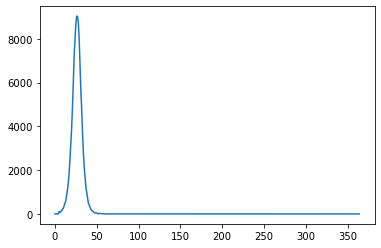

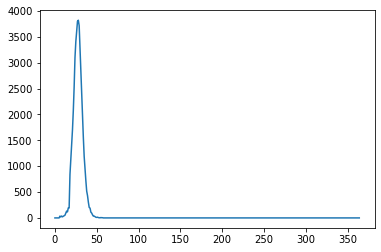

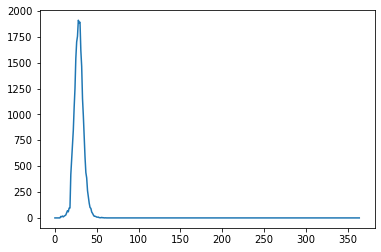

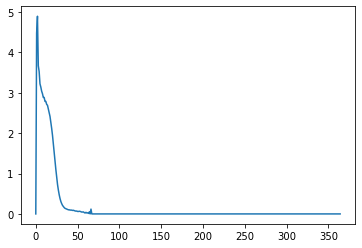

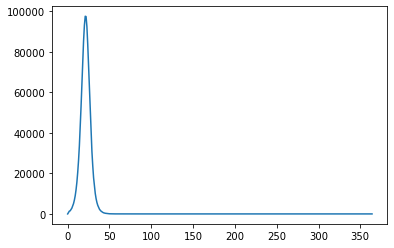

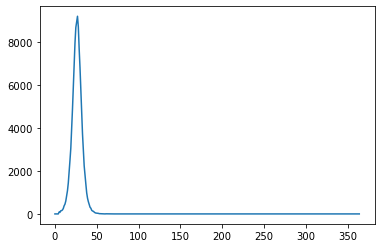

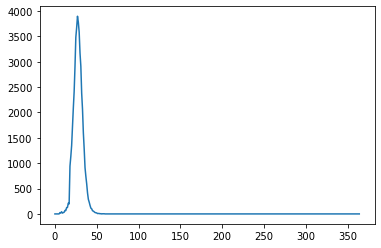

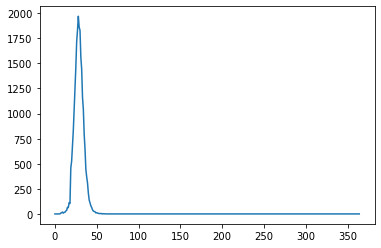

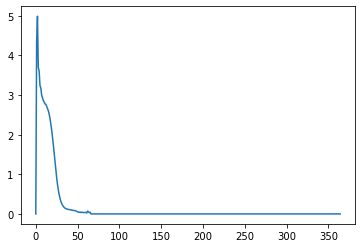

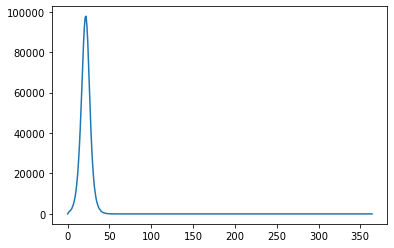

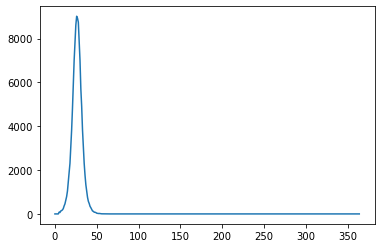

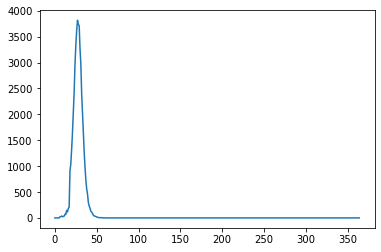

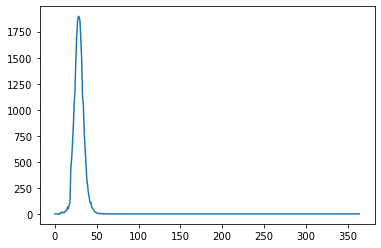

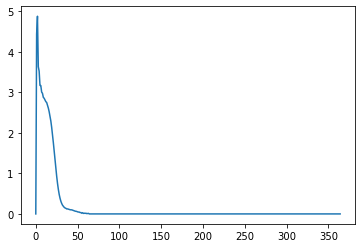

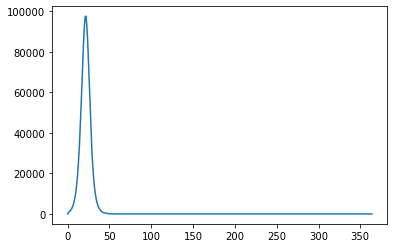

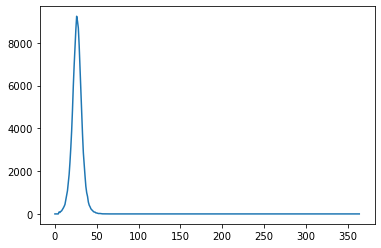

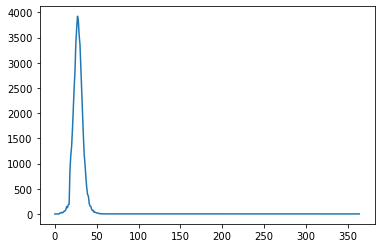

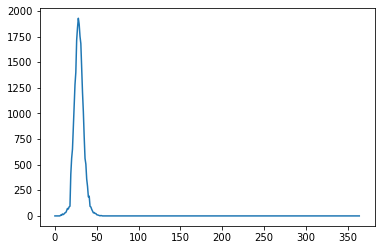

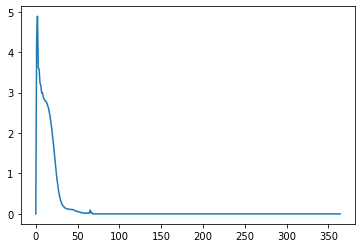

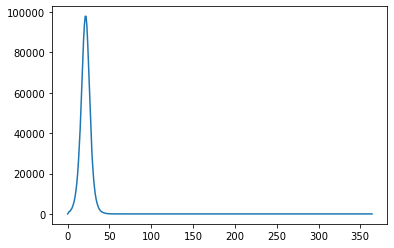

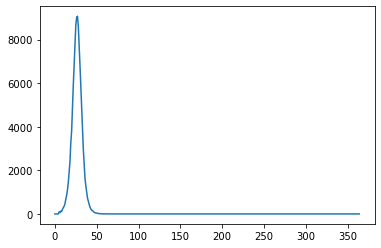

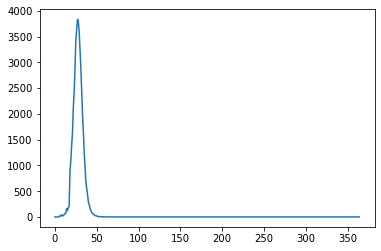

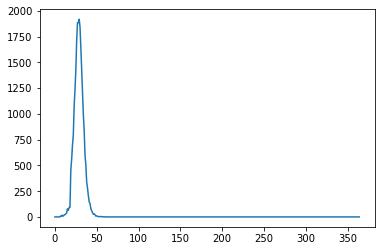

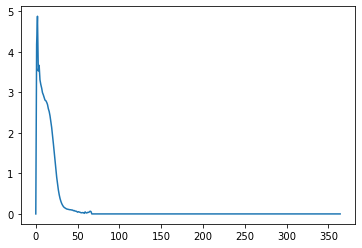

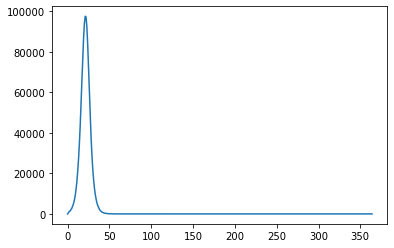

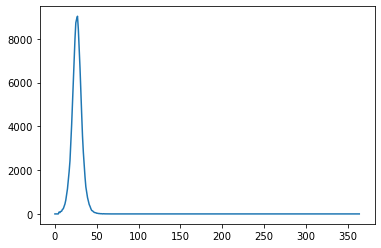

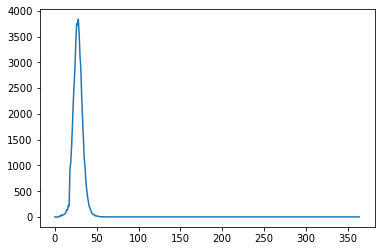

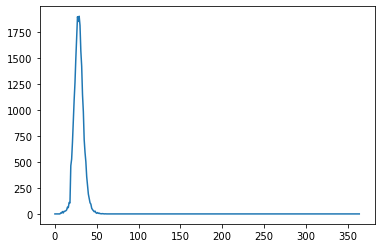

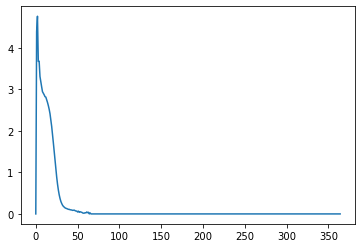

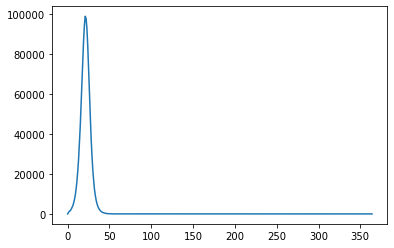

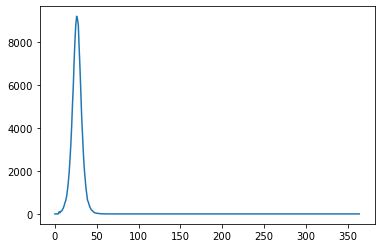

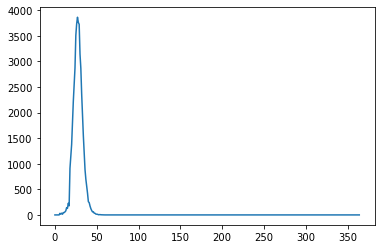

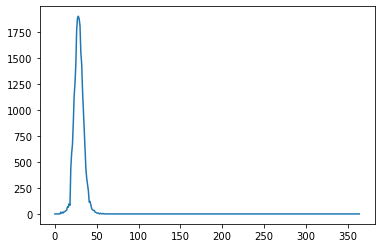

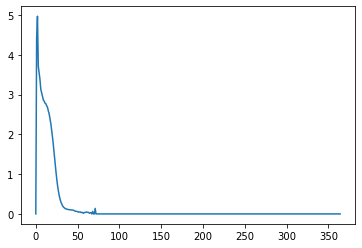

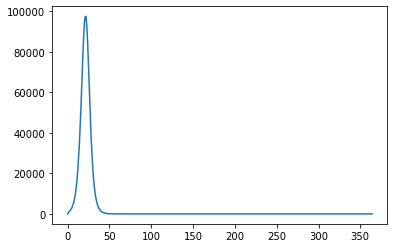

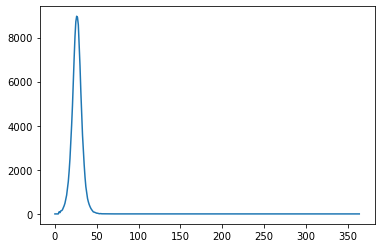

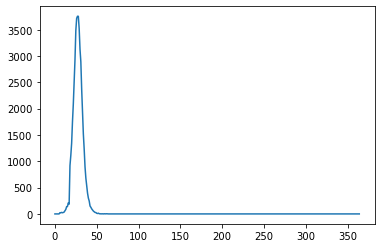

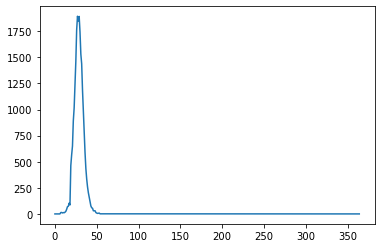

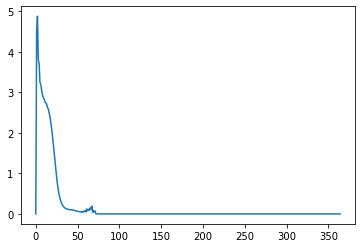

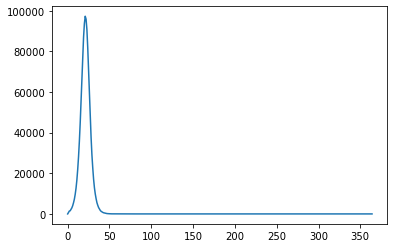

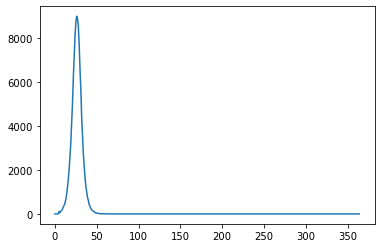

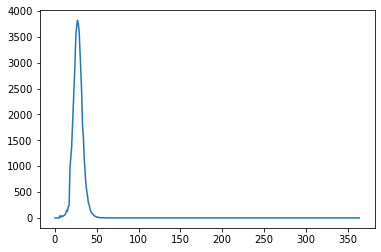

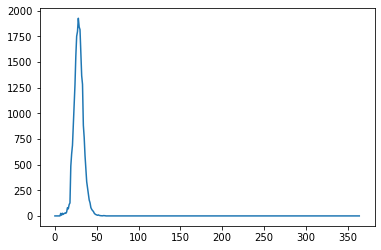

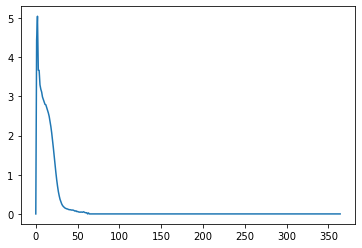

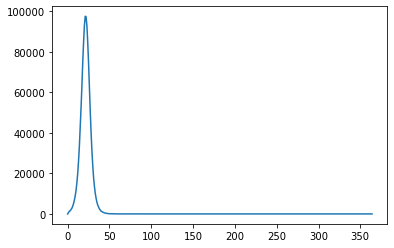

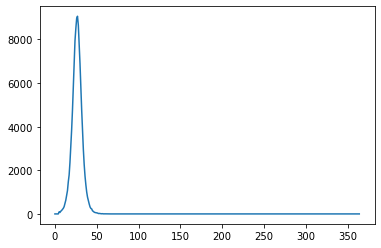

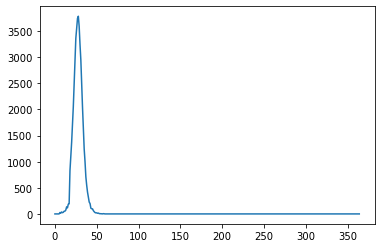

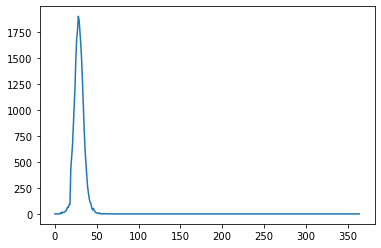

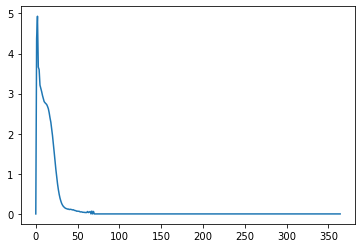

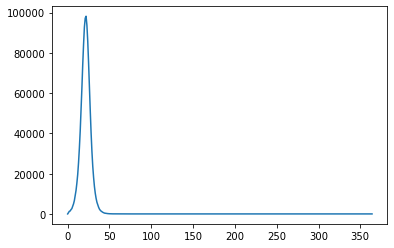

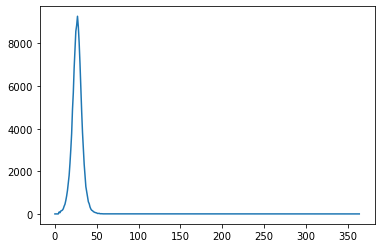

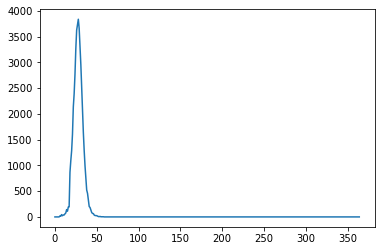

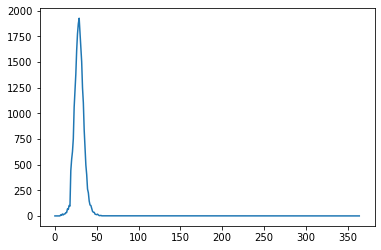

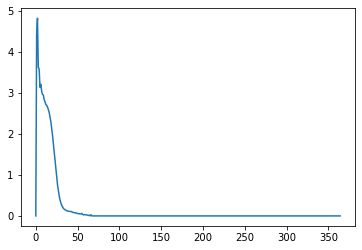

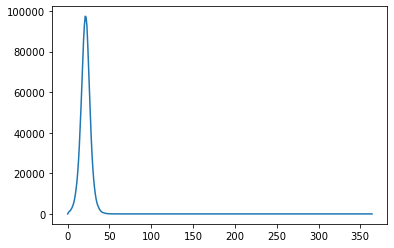

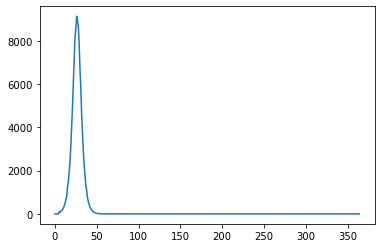

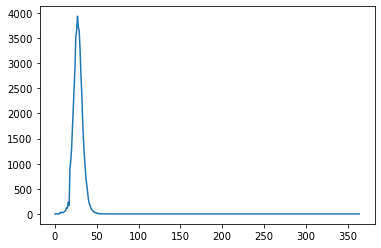

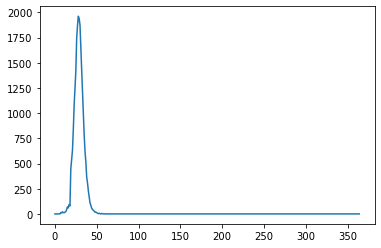

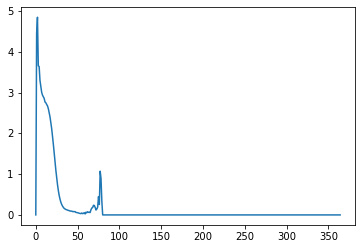

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import pandas as pd
import csv
from statistics import mean,variance
'''
Qu'est ce qu'on a comme résultats pour le moment :
- Les listes
- Taux de mortalité des gens contaminé
- Taux de mortalité par tranche d'age des gens contaminé

On peut donc envisager beaucoup d'autres résultats.


'''


listResReplication = [[] for i in range(0,30)]


for replication in listResReplication:
    
    listNumIteration = []
    listNbNouvCas = []
    listNbPersonneHosp = []
    listNbPersonneRea = []
    listNbNouvHosp = []
    listNbNouvRea = []
    listNbNouvMort = []
    nbCasCovidConnuTotal = 0
    listAgeMort = []
    listAgeNouvCasSymptomatique = []
    listReffectif = []

    f = open("log"+str(listResReplication.index(replication))+".txt", "r")
    fileLines = f.readlines()
    i = 0
    for line in fileLines:
        if("CompteurRand:" in line):
            listSplit = line.split(":")
            nbRandomGenere = (int(listSplit[1]))
        elif("##" not in line):
            if(i == 0):
                listNumIteration.append(int(line))
                i = i + 1
            elif(i==1):
                listNbNouvCas.append(int(line))
                i = i + 1
            elif(i==2):
                listNbPersonneHosp.append(int(line))
                i = i + 1
            elif(i==3):
                listNbPersonneRea.append(int(line))
                i = i + 1
            elif(i==4):
                listNbNouvHosp.append(int(line))
                i = i + 1
            elif(i==5):
                listNbNouvRea.append(int(line))
                i = i + 1
            elif(i==6):
                listNbNouvMort.append(int(line))
                i = i + 1
            elif(i==7):
                nbCasCovidConnuTotal = (int(line))
                i = i + 1
            elif(i==8):
                listReffectif.append(float(line))
                i = i + 1
            elif("AgeC:" in line):
                listSplit = line.split(":")
                listAgeNouvCasSymptomatique.append(int(listSplit[1]))
            elif("AgeD:" in line):
                listSplit = line.split(":")
                listAgeMort.append(int(listSplit[1]))
        
        else:
            i = 0

    f.close()

    
    
    
    
    plt.figure(listResReplication.index(replication)*5)
    print("Courbe des nouveaux cas sur la réplication num : " +str(listResReplication.index(replication)))
    plt.plot(listNumIteration, listNbNouvCas)  # Matplotlib plot.
    plt.savefig("nouvCasParisFullNoVaccin0.1_replication"+str(listResReplication.index(replication))+".png")
    string = "nouvCasParisFullNoMesure_replication"+str(listResReplication.index(replication))+".csv"
    with open(string, "w") as fCsv:
        write = csv.writer(fCsv)
        write.writerow(listNbNouvCas)
    
    plt.figure(listResReplication.index(replication)*5+1)
    print("Courbe des nouvelles hospitalisation sur la réplication num : " +str(listResReplication.index(replication)))
    plt.plot(listNumIteration, listNbNouvHosp)
    plt.savefig("nouvHospParisFullNoVaccin0.1_replication"+str(listResReplication.index(replication))+".png")
    with open("nouvHospParisFullNoMesure_replication"+str(listResReplication.index(replication))+".csv", "w") as fCsv:
        write = csv.writer(fCsv)
        write.writerow(listNbNouvHosp)
    
    plt.figure(listResReplication.index(replication)*5+2)
    print("Courbe des nouvelles réanimation sur la réplication num : " +str(listResReplication.index(replication)))
    plt.plot(listNumIteration, listNbNouvRea)
    plt.savefig("nouvReaParisFullNoVaccin0.1_replication"+str(listResReplication.index(replication))+".png")
    with open("nouvReaParisFullNoMesure_replication"+str(listResReplication.index(replication))+".csv", "w") as fCsv:
        write = csv.writer(fCsv)
        write.writerow(listNbNouvRea)
    
    plt.figure(listResReplication.index(replication)*5+3)
    print("Courbe des nouveaux morts sur la réplication num : " +str(listResReplication.index(replication)))
    plt.plot(listNumIteration, listNbNouvMort)
    plt.savefig("nouvMortParisFullNoVaccin0.1_replication"+str(listResReplication.index(replication))+".png")
    with open("nouvMortParisFullNoMesure_replication"+str(listResReplication.index(replication))+".csv", "w") as fCsv:
        write = csv.writer(fCsv)
        write.writerow(listNbNouvMort)
    
    print("Courbe de Reffectif sur la réplication num : " +str(listResReplication.index(replication)))
    plt.figure(listResReplication.index(replication)*5+4)
    plt.plot(listNumIteration, listReffectif)
    plt.savefig("ReffectifParisFullNoVaccin0.1_replication"+str(listResReplication.index(replication))+".png")
    with open("ReffectifParisFullNoMesure_replication"+str(listResReplication.index(replication))+".csv", "w") as fCsv:
        write = csv.writer(fCsv)
        write.writerow(listReffectif)

    nbMortTotal = sum(listNbNouvMort)
    tauxDeMortCasConnu = (nbMortTotal / nbCasCovidConnuTotal) * 100

    print("Le taux de mort de cas connu est de : " + str(tauxDeMortCasConnu) + "%")

    ## IL ME FAUT L'AGE DES GENS CONTAMINE AUSSI ... 


    nbAge0 = 0
    nbAge1 = 0
    nbAge2 = 0
    nbAge3 = 0
    nbAge4 = 0
    nbAge5 = 0
    nbAge6 = 0
    nbAge7 = 0

    for i in listAgeNouvCasSymptomatique:
        if i == 0:
            nbAge0 = nbAge0 + 1
        elif i == 1:
            nbAge1 = nbAge1 + 1
        elif i == 2:
            nbAge2 = nbAge2 + 1
        elif i == 3:
            nbAge3 = nbAge3 + 1
        elif i == 4:
            nbAge4 = nbAge4 + 1
        elif i == 5:
            nbAge5 = nbAge5 + 1
        elif i == 6:
            nbAge6 = nbAge6 + 1
        elif i == 7:
            nbAge7 = nbAge7 + 1


    nbAgeMort0 = 0
    nbAgeMort1 = 0
    nbAgeMort2 = 0
    nbAgeMort3 = 0
    nbAgeMort4 = 0
    nbAgeMort5 = 0
    nbAgeMort6 = 0
    nbAgeMort7 = 0

    for i in listAgeMort:
        if i == 0:
            nbAgeMort0 = nbAgeMort0 + 1
        elif i == 1:
            nbAgeMort1 = nbAgeMort1 + 1
        elif i == 2:
            nbAgeMort2 = nbAgeMort2 + 1
        elif i == 3:
            nbAgeMort3 = nbAgeMort3 + 1
        elif i == 4:
            nbAgeMort4 = nbAgeMort4 + 1
        elif i == 5:
            nbAgeMort5 = nbAgeMort5 + 1
        elif i == 6:
            nbAgeMort6 = nbAgeMort6 + 1
        elif i == 7:
            nbAgeMort7 = nbAgeMort7 + 1


    print("Le taux de mortalité pour les 0 - 15 ans est de : " + str( (nbAgeMort0/nbAge0) * 100) + "%") 
    print("Le taux de mortalité pour les 15 - 25 ans est de : " + str( (nbAgeMort1/nbAge1) * 100) + "%") 
    print("Le taux de mortalité pour les 25 - 35 ans est de : " + str( (nbAgeMort2/nbAge2) * 100) + "%") 
    print("Le taux de mortalité pour les 35 - 45 ans est de : " + str( (nbAgeMort3/nbAge3) * 100) + "%") 
    print("Le taux de mortalité pour les 45 - 55 ans est de : " + str( (nbAgeMort4/nbAge4) * 100) + "%") 
    print("Le taux de mortalité pour les 55 - 65 ans est de : " + str( (nbAgeMort5/nbAge5) * 100) + "%") 
    print("Le taux de mortalité pour les 65 - 75 ans est de : " + str( (nbAgeMort6/nbAge6) * 100) + "%") 
    print("Le taux de mortalité pour les 75 + ans est de : " + str( (nbAgeMort7/nbAge7) * 100) + "%")
    
    print("############\n################")
    print(" replication = " + str(listResReplication.index(replication)))
    replication.append(listNumIteration)
    replication.append(listNbNouvCas)
    replication.append(listNbPersonneHosp)
    replication.append(listNbPersonneRea)
    replication.append(listNbNouvHosp)
    replication.append(listNbNouvMort)
    replication.append(listReffectif)
    replication.append(nbCasCovidConnuTotal)
    replication.append(tauxDeMortCasConnu)
    replication.append((nbAgeMort0/nbAge0) * 100)
    replication.append((nbAgeMort1/nbAge1) * 100)
    replication.append((nbAgeMort2/nbAge2) * 100)
    replication.append((nbAgeMort3/nbAge3) * 100)
    replication.append((nbAgeMort4/nbAge4) * 100)
    replication.append((nbAgeMort5/nbAge5) * 100)
    replication.append((nbAgeMort6/nbAge6) * 100)
    replication.append((nbAgeMort7/nbAge7) * 100)
    replication.append(int(nbRandomGenere))
    
        

dataframeResultats = pd.DataFrame({"Champs":["nbCasCovidConnuTotal","tauxDeMortCasConnu", "tauxDeMort0-15ans", "tauxDeMort15-25ans","tauxDeMort25-35ans","tauxDeMort35-45ans","tauxDeMort45-55ans","tauxDeMort55-65ans","tauxDeMort65-75ans","tauxDeMort75+ans","nbRandomGenere"]})
numRepli = 1
listResReplicationTruncated = []
for replication in listResReplication:
    nomRepli = "R"+str(numRepli)
    dataframeResultats[nomRepli] = replication[-11:]
    listResReplicationTruncated.append(replication[-11:])
    numRepli = numRepli + 1
    

listMoyenne = [mean(list(map(float,list(r)))) for r in zip(*listResReplicationTruncated)]

listVariance = [variance(list(map(float,list(r)))) for r in zip(*listResReplicationTruncated)]

'''
Confidence Intervals Using the t Distribution
If we’re working with a small sample (n <30), we can use the t.interval() function from the scipy.stats library to calculate a confidence interval for a population mean.

The following example shows how to calculate a confidence interval for the true population mean height (in inches) of a certain species of plant, using a sample of 15 plants:



###########
Confidence Intervals Using the Normal Distribution
If we’re working with larger samples (n≥30), we can assume that the sampling distribution of the sample mean is normally distributed (thanks to the Central Limit Theorem) and can instead use the norm.interval() function from the scipy.stats library.




'''

listIntervalle95 = [st.t.interval(alpha=0.95, df=len(r)-1, loc=np.mean(r), scale=st.sem(r)) for r in zip(*listResReplicationTruncated)]

dataframeResultats["Moyenne"] = listMoyenne
dataframeResultats["Variance"] = listVariance
dataframeResultats["Intervalle95%"] = listIntervalle95

print(dataframeResultats)

dataframeResultats.to_csv("statsParisFullNoMesure.csv", sep="|")
dataframeResultats.to_html("statsParisFullNoMesure.html",float_format='%.3f')